# Tech Blues Capstone
## First Draft Notebook

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import acquire
import tyler_explore

## Project Overview

## Project Planning

## Data Acquisition

In [2]:
# use our 'get_survey_data' function to bring in the data
df = acquire.get_survey_data('survey.csv')

In [3]:
#Looking at shape
df.shape

(1259, 27)

In [4]:
#Looking at datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


----------------------------------------------------
DataFrame Head
             Timestamp  Age  Gender        Country state self_employed  \
0  2014-08-27 11:29:31   37  Female  United States    IL           NaN   
1  2014-08-27 11:29:37   44       M  United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male         Canada   NaN           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interv

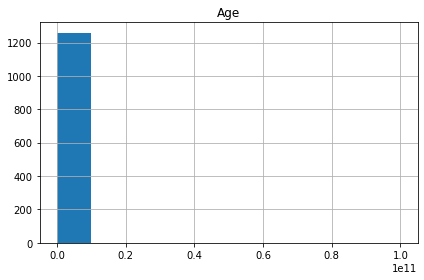

In [5]:
# Using summarize function to see head of dataframe, datatypes, amount of null values, stats, and value_counts
acquire.summarize(df)

------

# Acquire Takeaways
- Good amount of nulls to drop or fill in 
- Choose to change some of the object datatypes to numeric datatype, decide what to drop, or decide what to use in modeling
- columns to encode to numeric datatype: gender, Country, self_employed, family history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys-health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence
- drop unnecassary columns: state and comments




------

## Data Preparation

To prep this data before exploration, the following was done:

Column Names:
- Timestamp: change to datetime
- Age: remove outliers/obvious typos
- Gender: male:0, female:1, other:2
- Country: Keep N America, Europe
- state: drop column
- self_employed: No:0, Yes:1
- family_history: No:0, Yes:1
- treatment: No:0, Yes:1
- work_interfere: Never:0, Rarely:1, Sometimes:2, Often:3, NA:4
- no_employees: <5:0, 6-25:1, 26-100:2, 101-500:3, 501-1000:4, >1000:5
- remote_work: No:0, Yes:1
- tech_company: No:0, Yes:1
- benefits: No:0, Yes:1, Don't know:2
- care_options: No:0, Yes:1, Not sure:2
- wellness_program: No:0, Yes:1, Don't know:2
- seek_help: No:0, Yes:1, Don't know:2
- anonymity: No:0, Yes:1, Don't know:2
- leave: Very difficult:0, Somewhat difficult:1, Don't know:2, Somewhat easy:3, Very easy:4
- mental_health_consequence: No:0, Yes:1, Maybe:2
- phys-health_consequence: No:0, Yes:1, Maybe:2
- coworkers: No:0, Yes:1, Some of them:2
- supervisor: No:0, Yes:1, Some of them:2
- mental_health_interview: No:0, Yes:1, Maybe:2
- phys_health_interview: No:0, Yes:1, Maybe:2
- mental_vs_physical: No:0, Yes:1, Don't know:2
- obs_consequence: No:0, Yes:1
- comments: Drop column

------

### Data Preparation Takeways

------

## Data Exploration

### Univariate

#### Univariate - Key Findings, Takeaways, and Next Steps:

### Bivariate

#### Bivariate - Key Findings, Takeaways, and Next Steps:

### Multivariate

#### Multivariate - Key Findings, Takeaways, and Next Steps:

### Hypothesis Testing
#### Target Variable: 'work_interfere'

#### Hypothesis 1: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [ ]:
# Here is the work for hypothesis 1

#### Hypothesis 1 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 2: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [5]:
# Here is the work for hypothesis 2

#### Hypothesis 2 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 3: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [6]:
# Here is the work for hypothesis 3

#### Hypothesis 3 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 4: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 5: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 6: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 7: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 8: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 9: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 10: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

------

### Explore Takeaways

------

## Modeling

### Initital Setup

### Model 1: [insert model name here]

#### Model 1: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 2: [insert model name here]

#### Model 2: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 3: [insert model name here]

#### Model 3: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 4: [insert model name here]

#### Model 4: [insert model name here] - Key Findings, Takeaways, and Next Steps:

------

### Modeling Takeways

------

### Summary - Key Findings, Takeaways, and Next Steps:

------